<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入所需要的包" data-toc-modified-id="导入所需要的包-1">导入所需要的包</a></span></li><li><span><a href="#其他行业数据处理分析" data-toc-modified-id="其他行业数据处理分析-2">其他行业数据处理分析</a></span><ul class="toc-item"><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-2.1">数据预处理</a></span><ul class="toc-item"><li><span><a href="#1.删除缺失值过多、没有意义的特征" data-toc-modified-id="1.删除缺失值过多、没有意义的特征-2.1.1">1.删除缺失值过多、没有意义的特征</a></span></li><li><span><a href="#2.缺失值填充、去除异常值、归一化数据" data-toc-modified-id="2.缺失值填充、去除异常值、归一化数据-2.1.2">2.缺失值填充、去除异常值、归一化数据</a></span></li></ul></li><li><span><a href="#数据特征的提取和筛选" data-toc-modified-id="数据特征的提取和筛选-2.2">数据特征的提取和筛选</a></span></li><li><span><a href="#不平衡数据处理" data-toc-modified-id="不平衡数据处理-2.3">不平衡数据处理</a></span></li><li><span><a href="#使用随机森林训练机器学习模型" data-toc-modified-id="使用随机森林训练机器学习模型-2.4">使用随机森林训练机器学习模型</a></span></li></ul></li><li><span><a href="#其他行业分类模型评价" data-toc-modified-id="其他行业分类模型评价-3">其他行业分类模型评价</a></span><ul class="toc-item"><li><span><a href="#绘制混淆矩阵" data-toc-modified-id="绘制混淆矩阵-3.1">绘制混淆矩阵</a></span></li><li><span><a href="#ROC曲线AUC值" data-toc-modified-id="ROC曲线AUC值-3.2">ROC曲线AUC值</a></span></li></ul></li><li><span><a href="#预测其他行业第-6-年财务数据造假的上市公司" data-toc-modified-id="预测其他行业第-6-年财务数据造假的上市公司-4">预测其他行业第 6 年财务数据造假的上市公司</a></span></li></ul></div>

# 导入所需要的包

In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,confusion_matrix,auc,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from matplotlib import pyplot
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False  

# 其他行业数据处理分析

In [2]:
qitahangye_data=pd.read_csv(r"其他行业.csv")
qitahangye_data.head()

,股票代码_单位:nan,所属行业_单位:nan,实际披露时间_单位:nan,发布时间_单位:nan,报告截止日期_单位:nan,截止日期_单位:nan,报告类型_单位:nan,会计区间_单位:nan,合并标志：1-合并，2-母公司_单位:nan,会计准则_单位:nan,...,流动资产周转率_单位:次,营业周期_单位:天/次,存货周转率_单位:次,固定资产周转率_单位:次,固定资产合计周转率_单位:次,应付账款周转天数_单位:天/次,存货周转天数_单位:nan,总资产周转率_单位:次,应收账款周转率_单位:次,是否在当年造假_单位:nan
0,9063,批发和零售业,3,3,2,1,A,12,1,CHAS_2007,...,1.3751,148.8938,7.4240,20.9362,15.2980,75.4337,48.4911,1.2774,3.5856,0.0
1,10083,信息传输、软件和信息技术服务业,4,4,4,1,A,12,1,CHAS_2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,15617,建筑业,3,3,2,1,A,12,1,CHAS_2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,21990,交通运输、仓储和邮政业,2,2,2,1,A,12,1,CHAS_2007,...,4.1610,57.1883,15.9442,172.8106,60.5845,17.7157,22.5788,2.8815,10.4018,0.0
4,34130,信息传输、软件和信息技术服务业,3,3,2,1,A,12,1,CHAS_2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## 数据预处理

### 1.删除缺失值过多、没有意义的特征

In [3]:
def Delete_LoseRate_Column(data,lose_rate):
    regular_list = []
    nan_list = []
    for i in list(data.columns):
        if data[i].isnull().sum()/(data.shape[0]-1) <= lose_rate:#-1不影响
            regular_list.append(i)
        else:
            nan_list.append(i)
    return regular_list,nan_list

lose_rate = 0.6
name_list,delete_list=Delete_LoseRate_Column(qitahangye_data,lose_rate)
qitahangye_data=qitahangye_data[name_list]
print("删除了"+str(len(delete_list))+"列")
print("保留了"+str(len(name_list))+"列")

删除了248列
保留了116列


In [4]:
#删除非数字的、从头到尾一个值的、明显没有分类意义的
def FindToBeDelete_Col(company_data):
    NotNumCol_List = [col for col in company_data.columns.values if company_data[col].dtype == 'object']
    SameElemCol_List = [col for col in list(company_data.columns) if len(set(company_data[col]))==1]
    NoSense_List=list(company_data.columns[:6])#+list(company_data.columns[-1:])
    ToBeDelete_Col=list(set(NotNumCol_List).union(set(SameElemCol_List),set(NoSense_List)))
    return ToBeDelete_Col

In [5]:
ToBeDelete_Col=FindToBeDelete_Col(qitahangye_data)
qitahangye_data2=qitahangye_data.drop(ToBeDelete_Col,axis=1)

In [6]:
#把要预测的部分行（flag为nan）删掉
qitahangye_data2=qitahangye_data2[pd.notnull(qitahangye_data2['是否在当年造假_单位:nan'])]#isnull
qitahangye_data2.head()

,货币资金_单位:元,应收票据_单位:元,应收账款_单位:元,预付款项_单位:元,其他应收款_单位:元,存货_单位:元,其他流动资产_单位:元,流动资产合计_单位:元,可供出售金融资产_单位:元,长期股权投资_单位:元,...,净利润(净亏损以“－”号填列)_单位:元,营业税金及附加_单位:元,营业外支出_单位:元,持续经营净利润_单位:元,归属于少数股东的综合收益总额_单位:元,所得税费用_单位:元,营业外收入_单位:元,少数股东损益_单位:元,营业总成本_单位:元,是否在当年造假_单位:nan
0,5.308711e+09,120140919.2,8.334355e+07,1.068590e+09,1.998471e+08,1.890696e+09,7465037.78,8.879169e+09,1.262229e+07,NaN,...,8.174721e+08,2.377917e+08,19997626.17,NaN,-997639.38,1.500600e+08,5.157056e+07,-997639.38,3.045615e+10,0.0
1,3.929683e+07,NaN,3.117961e+08,1.379073e+06,2.154801e+06,4.826158e+07,NaN,4.028884e+08,NaN,NaN,...,3.682732e+07,7.915864e+06,382566.13,NaN,NaN,1.322933e+07,1.030374e+06,NaN,3.054139e+08,0.0
2,8.052528e+09,13051800.0,2.403950e+09,1.119295e+09,1.184279e+08,1.982253e+09,71605093.58,1.376111e+10,2.170486e+08,1.072606e+08,...,7.087116e+08,7.125510e+06,31155887.39,NaN,-57356195.41,1.514644e+08,4.451186e+06,-9765095.71,8.312055e+09,0.0
3,7.174299e+08,48117321.5,5.491743e+08,1.281890e+08,1.120131e+08,3.222185e+08,60000000.00,1.939898e+09,4.196550e+07,8.180806e+07,...,3.617678e+08,1.423113e+07,5117440.40,NaN,32462794.22,1.159928e+08,2.454146e+08,32462794.22,4.568449e+09,0.0
4,1.901583e+09,25630000.0,1.796365e+08,2.507800e+08,5.027240e+07,2.452314e+08,56526100.00,2.709660e+09,1.200000e+07,2.699741e+08,...,7.292442e+08,9.310730e+07,30988600.00,NaN,38385900.00,0.000000e+00,1.216655e+08,38385900.00,3.323598e+09,0.0


### 2.缺失值填充、去除异常值、归一化数据

In [7]:
#方便后面从列表变回dataframe
qitahangye_data2_columns=qitahangye_data2.columns

In [8]:
#调用KNN填充所有缺失数据
imputer = KNNImputer(n_neighbors=1)
qitahangye_data2= imputer.fit_transform(qitahangye_data2)
#qitahangye_data2.fillna(0,inplace=True)

In [9]:
qitahangye_data2=pd.DataFrame(qitahangye_data2)
Q1 = qitahangye_data2.quantile(0.25)
Q3 =qitahangye_data2.quantile(0.75)
IQR = Q3 - Q1
nan_means_noproblem=qitahangye_data2[(qitahangye_data2 < (Q1 - 1.5 * IQR)) | (qitahangye_data2> (Q3 + 1.5 * IQR))]
# 非空即异常
rows_not_null = nan_means_noproblem.count(axis=1) 
problem_index=rows_not_null[rows_not_null>60].index
selected_index=list(set(qitahangye_data2.index).difference(set(problem_index)))
qitahangye_data2=qitahangye_data2.iloc[selected_index]
#查看异常行数据的标签情况
Counter(qitahangye_data2.iloc[:,-1])

Counter({0.0: 6060, 1.0: 83})

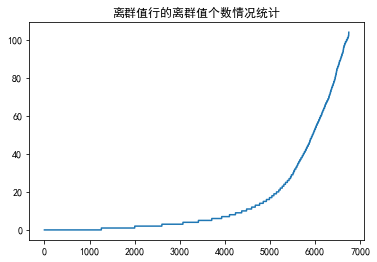

In [10]:
Sorted_rows_num=rows_not_null.sort_values()
Sorted_rows_num=Sorted_rows_num.reset_index(drop=True)
plt.title("离群值行的离群值个数情况统计")
Sorted_rows_num.plot()
plt.show()

In [11]:
#标准化归一化
sds=StandardScaler()
qitahangye_data2=sds.fit_transform(qitahangye_data2)
mms = MinMaxScaler()
qitahangye_data2= mms.fit_transform(qitahangye_data2)

把qitahangye_data2变回dataframe的形式

In [12]:
qitahangye_data2=pd.DataFrame(qitahangye_data2,columns=qitahangye_data2_columns)
qitahangye_data2.head()

,货币资金_单位:元,应收票据_单位:元,应收账款_单位:元,预付款项_单位:元,其他应收款_单位:元,存货_单位:元,其他流动资产_单位:元,流动资产合计_单位:元,可供出售金融资产_单位:元,长期股权投资_单位:元,...,净利润(净亏损以“－”号填列)_单位:元,营业税金及附加_单位:元,营业外支出_单位:元,持续经营净利润_单位:元,归属于少数股东的综合收益总额_单位:元,所得税费用_单位:元,营业外收入_单位:元,少数股东损益_单位:元,营业总成本_单位:元,是否在当年造假_单位:nan
0,0.071909,0.013455,0.004322,0.094669,0.019557,0.022371,0.000620,0.065267,0.000052,0.033194,...,0.489376,0.164103,0.056544,0.301682,0.591632,0.229178,0.012145,0.536449,0.150495,0.0
1,0.000532,0.001760,0.016169,0.000122,0.000211,0.000571,0.001246,0.002940,0.000007,0.000049,...,0.433120,0.040599,0.051121,0.242101,0.591647,0.163015,0.000243,0.536468,0.002051,0.0
2,0.109075,0.001462,0.124661,0.099161,0.011589,0.023455,0.005948,0.101164,0.000893,0.004169,...,0.481538,0.040174,0.059630,0.357656,0.579414,0.229857,0.001048,0.534120,0.041471,0.0
3,0.009718,0.005389,0.028478,0.011357,0.010962,0.003813,0.004984,0.014242,0.000173,0.003180,...,0.456536,0.043992,0.052430,0.247054,0.598885,0.212705,0.057796,0.545337,0.023039,0.0
4,0.025758,0.002870,0.009315,0.022217,0.004920,0.002902,0.004695,0.019902,0.000049,0.010494,...,0.483018,0.086369,0.059584,0.285312,0.600169,0.156618,0.028653,0.546911,0.016910,0.0


In [13]:
qitahangye_data2.iloc[:,-1]=qitahangye_data2.iloc[:,-1].astype('int')

## 数据特征的提取和筛选

高相关滤波（High Correlation filter）

In [14]:
def HighCorrelationFilter(data,index_column):
    corr = data.loc[:, index_column].corr()
    for i in index_column:
        for j in index_column:
            if corr[i][j] > 0.8 and i != j:  # setting the threshold as 20%
                index_column.remove(j)
    new_columns = index_column
    return new_columns

qitahangye_data2_columns=HighCorrelationFilter(qitahangye_data2,list(qitahangye_data2_columns))
qitahangye_feature_data=qitahangye_data2[qitahangye_data2_columns]
print("处理之后特征的个数变为：",len(qitahangye_data2_columns))

处理之后特征的个数变为： 75


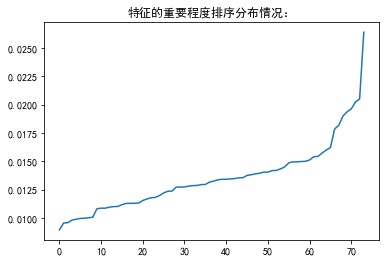

In [15]:
X = np.array(qitahangye_feature_data.iloc[:,:-1])
y = np.array(qitahangye_feature_data['是否在当年造假_单位:nan'])
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
pd.Series(np.sort(clf.feature_importances_ )).plot()
plt.title("特征的重要程度排序分布情况：")
plt.show()

In [16]:
arr = np.array(clf.feature_importances_  )
vital_columns=[qitahangye_feature_data.columns[i] for i in np.argsort(-arr)]
print("前十个重要的特征：",vital_columns[:10])

前十个重要的特征： ['营业外支出_单位:元', '资产减值损失_单位:元', '应付利息_单位:元', '稀释每股收益_单位:元', '资产处置收益_单位:元', '处置固定资产、无形资产和其他长期资产收回的现金净额_单位:元', '未分配利润_单位:元', '归属于母公司所有者(或股东)的净利润_单位:元', '财务费用_单位:元', '一年内到期的非流动负债_单位:元']


In [17]:
selected_features=vital_columns[:10]
selected_features.append('是否在当年造假_单位:nan')
selected_features.remove('资产减值损失_单位:元')
qitahangye_feature_data=qitahangye_feature_data[selected_features]
qitahangye_feature_data.head()

,营业外支出_单位:元,应付利息_单位:元,稀释每股收益_单位:元,资产处置收益_单位:元,处置固定资产、无形资产和其他长期资产收回的现金净额_单位:元,未分配利润_单位:元,归属于母公司所有者(或股东)的净利润_单位:元,财务费用_单位:元,一年内到期的非流动负债_单位:元,是否在当年造假_单位:nan
0,0.056544,0.000054,0.578947,0.230699,0.000015,0.396894,0.429469,0.081280,0.001046,0
1,0.051121,0.000009,0.458280,0.230236,0.000003,0.320982,0.366524,0.082804,0.000000,0
2,0.059630,0.000014,0.498716,0.228572,0.000021,0.374447,0.421417,0.078249,0.000340,0
3,0.052430,0.000259,0.478177,0.233889,0.000431,0.354766,0.390077,0.080214,0.000992,0
4,0.059584,0.005610,0.456996,0.229563,0.000152,0.339944,0.419193,0.098699,0.000183,0


## 不平衡数据处理

In [18]:
Counter(qitahangye_feature_data['是否在当年造假_单位:nan'])

Counter({0: 6060, 1: 83})

In [19]:
X_train,X_test,y_train,y_test=train_test_split(qitahangye_feature_data.iloc[:,:-1],
                                               qitahangye_feature_data['是否在当年造假_单位:nan'],
                                               test_size=0.3, random_state=44)

In [20]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_sample(X_train, y_train)

print(sorted(Counter(y_train_resampled).items()))

[(0, 3501), (1, 4103)]


## 使用随机森林训练机器学习模型

In [37]:
class_weight = dict({0:1, 1:1})
forest = RandomForestClassifier(
#与表单中的类关联的权重。如果没有给出，所有类都应该有一个权重。
   class_weight=class_weight,
#树的最大深度。如果没有，则扩展节点直到所有叶子
            max_depth=8,
            n_estimators=50,
            min_samples_split=4,
            min_samples_leaf=4,
            min_weight_fraction_leaf=0.2,
            random_state=8
    
)
forest.fit(X_train_resampled, y_train_resampled)
print(forest.score(X_test,y_test))#0.7best

0.6467715680954965


# 其他行业分类模型评价

## 绘制混淆矩阵

In [38]:
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=np.arange(2)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [39]:
Counter(y_test)

Counter({0: 1819, 1: 24})

[[1173  646]
 [   5   19]]


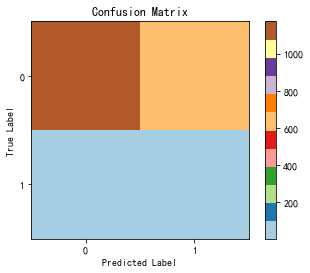

In [40]:
y_pre = forest.predict(X_test)
C=confusion_matrix(y_test, y_pre)
print(C)
plot_confusion_matrix(C)

## ROC曲线AUC值

In [41]:
fpr, tpr, thresholds=roc_curve(y_test, y_pre,pos_label=None,sample_weight=None,drop_intermediate=True)

In [42]:
def plot_roc(labels, predict_prob,name):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC'+"_" +name)
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

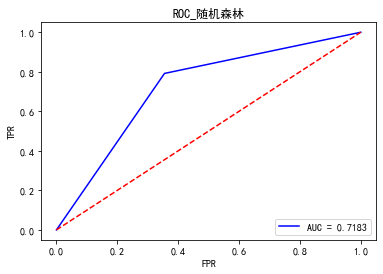

In [43]:
plt.figure()
plot_roc(y_test, y_pre,'随机森林')
#plot_roc(Ytest,y_pre_cgbc,'XGBoost')

保存模型

In [44]:
joblib.dump(forest,"forest_其他行业.pkl")

['forest_其他行业.pkl']

# 预测其他行业第 6 年财务数据造假的上市公司

In [45]:
qitahangye0 = pd.read_csv(r'其他行业.csv')
qitahangye0=qitahangye0[pd.isnull(qitahangye0['是否在当年造假_单位:nan'])]
qitahangye0=qitahangye0[['股票代码_单位:nan']+selected_features]
qitahangye0=qitahangye0.reset_index(drop="True")

In [46]:
qitahangye=qitahangye0.iloc[:,1:-1]
#方便后面从列表变回dataframe
qitahangye_columns=qitahangye.columns
#调用KNN填充所有缺失数据
imputer = KNNImputer(n_neighbors=1)
qitahangye= imputer.fit_transform(qitahangye)
qitahangye=pd.DataFrame(qitahangye)

In [47]:
#除掉异常值
Q1 = qitahangye.quantile(0.25)
Q3 =qitahangye.quantile(0.75)
IQR = Q3 - Q1
nan_means_noproblem=qitahangye[(qitahangye < (Q1 - 1.5 * IQR)) | (qitahangye> (Q3 + 1.5 * IQR))]
rows_not_null = nan_means_noproblem.count(axis=1) 
problem_index=rows_not_null[rows_not_null>60].index
selected_index=list(set(qitahangye.index).difference(set(problem_index)))
qitahangye=qitahangye.iloc[selected_index]

In [48]:
#标准化归一化
sds=StandardScaler()
qitahangye=sds.fit_transform(qitahangye)
mms = MinMaxScaler()
qitahangye= mms.fit_transform(qitahangye)
qitahangye=pd.DataFrame(qitahangye,columns=qitahangye_columns)
qitahangye.head()

,营业外支出_单位:元,应付利息_单位:元,稀释每股收益_单位:元,资产处置收益_单位:元,处置固定资产、无形资产和其他长期资产收回的现金净额_单位:元,未分配利润_单位:元,归属于母公司所有者(或股东)的净利润_单位:元,财务费用_单位:元,一年内到期的非流动负债_单位:元
0,0.004300,3.251203e-05,0.745186,0.641636,1.300526e-04,0.024202,0.026157,0.053414,0.000017
1,0.003114,7.168599e-06,0.639923,0.640708,2.824648e-07,0.020757,0.023594,0.050470,0.000373
2,0.003513,9.419796e-05,0.684211,0.637142,6.087911e-05,0.025146,0.027861,0.042497,0.000505
3,0.003068,8.383390e-07,0.679076,0.640723,1.691566e-07,0.020630,0.023603,0.050361,0.000013
4,0.004492,2.523035e-04,0.661104,0.644320,1.220479e-04,0.022592,0.025730,0.056905,0.000004


In [49]:
flag_list=forest.predict(qitahangye)

In [50]:
qitahangye['预测是否在当年造假_单位:nan']=flag_list
Counter(flag_list)

Counter({0: 1360, 1: 133})

In [51]:
qitahangye0[qitahangye['预测是否在当年造假_单位:nan']==1]['股票代码_单位:nan'].to_csv("result_3.csv",index=False)